In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

In [ ]:
np.random.seed(2)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
import itertools
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential


In [ ]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
sns.set(style='white', context='notebook', palette='deep')

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
train = pd.read_csv("/content/drive/My Drive/digit-recognizer/train.csv" )
test = pd.read_csv("/content/drive/My Drive/digit-recognizer/test.csv")



In [ ]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
test.shape

(28000, 784)

In [ ]:
train.shape

(42000, 785)

In [ ]:
Y_train = train["label"]
Y_train

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [ ]:
X_train = train.drop("label" , axis = 1)
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train.shape

(42000, 784)

In [ ]:
Y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


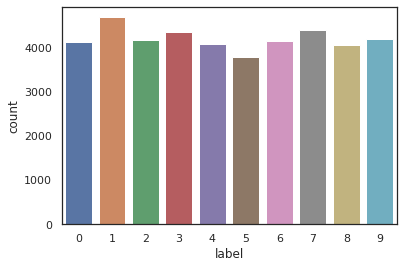

In [ ]:
sns.countplot(Y_train)

In [ ]:
X_train.isnull().any().describe()


count       784
unique        1
top       False
freq        784
dtype: object

In [ ]:
for i in range(X_train.shape[1]-1):
  if (X_train.isnull().any()[i] == True):
    print(X_train.isnull().any().index[i])



In [ ]:
range(len(X_train))

range(0, 42000)

In [ ]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

We perform a grayscale NORMALIZATION to reduce the effect of illumination's differences.

Moreover the CNN CONVERGES FASTER on [0..1] data than on [0..255]

In [ ]:
X_train = X_train/255.0
test = test/255.0

In [ ]:
X_train = X_train.values.reshape( -1 , 28 , 28 , 1)
test = test.values.reshape(-1 , 28 ,28 , 1 )

NameError: ignored

In [ ]:
test[1].shape

(28, 28, 1)

**MNIST** images are GRAY SCALED so it use only ONE channel. 
images which are RGB are having 3 CHANNELS. Thus we need to convert it to (28 , 28 ,1 ) where RGB images to (28 , 28 , 3)

 For RGB images, there is 3 channels, we would have reshaped 784px vectors to 28x28x3 3D matrices.

In [ ]:
Y_train = to_categorical(Y_train, num_classes = 10)

**Labels** are 10 digits numbers from 0 to 9. We need to encode these lables to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train , Y_train ,  test_size = 0.1, random_state=0)

a **small fraction (10%) became the validation se**t which the model is evaluated and the **rest (90%) is used to train the model.**

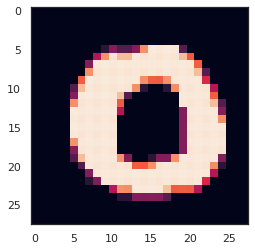

In [ ]:
plt.imshow(X_train[2][:,:,0])

MaxPooling: Reduces OVERFITTING of the Model as it tries to FIND GLOBAL FEATURES from the LOCAL FEATURES.
It reduces DIMENSIONS thus reduces COMPUTATIONAL.
and also it REDUCES OVER-FITTING.

Combining convolutional and pooling layers, CNN are able to COMBINE Local features and LEARN more GLOBAL features of the image.


Dense Layer: PROPOTATION/percentage of NODES (in A LAYER) are REMOVED. By setting their WEIGHTS to 0 . REDUCES Overfitting and GENERALIZES . why???
....
This drops randomly a propotion of the network and forces the network to LEARNS FEATURES in a DISTRIBUTED WAY.
.........
This technique also improves generalization and reduces the overfitting.


.........................................

RELU :Adds NON LINEARITY to the network. So the Network can LEARN NON LENEAR FEATURES and non OUTPUTS.

 FLATTEN lAYER: all the FEATURE MAP/ FEATURES that we have got. We try to ACCESS them in ONE VECTOR/one single 1D vector. It COMINES ALL the found local FEATURES of the previous convolutional layers.

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(filters=32 , kernel_size = (5,5) , padding= "Same", activation = 'relu' , input_shape = (28 , 28 , 1)))
model.add(Conv2D(filters=32 , kernel_size = (5,5) , padding= "Same", activation = 'relu' ))



In [ ]:
model.add(MaxPool2D(pool_size = (2 , 2)))


In [ ]:
model.add(Dropout(0.25))

In [ ]:
model.add(Conv2D(filters = 64, kernel_size = (3,3) , padding = "Same" , activation = "relu"))
model.add(Conv2D(filters = 64, kernel_size = (3,3) , padding = "Same" , activation = "relu"))

In [ ]:
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(256 , activation = "relu"))

In [ ]:
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

LOSS Function: How much GOOD or BAD , our MODEL is
 

ADAGRAD has MORE AGGRESSIVE LEARNING RATE wrt RMSprop . SGD is more SLOWER than RMSprop... 

In [ ]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [ ]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])


To converge FASTER to the MINIMUM LOSS 
and to converge 
To take BIGGER STEPS However the sampling is very poor with an high LR and the optimizer could probably fall into a local minima. 


In order to make the optimizer CONVERGE FASTER and CLOSEST to the GLOBAL Minimum of the loss function, i have used an annealing method of the learning rate (LR) as shown in the function below.
HIGHER LR value then BIGGER STEPS and thus QUICKER the convergence.BUT the problem with HIGH LEARNING RATE is that (the sampling is very poor with an high LR and the optimizer could probably FALL into LOCAL minima).

Its BETTER to have a DECREASING(not saying LOWER BUT A DECREASING LEARNING RATE) learning rate during the training to reach EFFICIENTLY the global minimum of the loss function.

To keep the advantage of the FAST computation time with a HIGH LR, I DECREASED the LR DYNAMICALLY every X steps (epochs) depending if it is necessary (condition: when accuracy is not improved).
CONDITION we applied in this CODE BELOW for decreasing LR: AFTER 3 (x/any value of epochs) EPOCHS , if the  ACCURACY is not INCREASED. 
e.g:i choose to reduce the LR by half if the accuracy is not improved after 3 epochs.


In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [ ]:
epochs = 1 # Turn epochs to 30 to get 0.9967 accuracy it fits for this example/data and for this Particular code and FOR OTHER CODES if we INCREASE the Epochs then ACCURACY can and most likely IMPROVE.
batch_size = 86

DATA AUGMENTATION helps to :
Produce MORE and MORE DATA. 
Produce Data with DIFFERENT TRANSFORMATION.(Different SCALE)(DIFFERENT ROTATION)
(DIFFERENT OBJECT POSITIONS)(DIFFERENT COLORING Maybe IF YOUR DATA IS NOT DEPENDENT on color then we MUST ADD this Feature in the NEW TRAINING Data which we have Formed)
(Different AFFINE ) 
Transform the DATA according to the PROBLEM/TASK which you are Handling for now...
For example : the POSITIONS of the OBJECT is not IMPORTANT or DONT HAVE ANY MEANING to the TASK which we want to Compute/find.Then TRANSFORM the Images INTERMS of the CHANGE IN THE POSITION of the OBJECTS in the Image. 
This will remove the POSITION CONTEXUAL INFORMATION from the Model and thus will REDUCE OVER FITTING TO THE PREVIOUS DATA WHICH HAD SOME CONTEXTUAL/POSITIONAL DATA. But this NEW DATA can help the NN Model to NOT CONSIDER THE POSITION Information AS IN THIS PARTICULAR SCENERIO it is not Important.


See the DATA and then DO THE TRANSFORMATION. 
e.g: if alphabetic data then DIFFERENT TRANSFORMATION wrt if the data is IMAGE OF REAL WORLD OBJECTS.

TRANSFORMATION means the VARIATION in the Data. Variation can be ANY VARIATION(postional or scaling or shape of the object variation (this will GENERALIZE the Shape of the THAT PARTICULAR OBJECT as Different Objects have Different shape/style Variations) maybe , background variation , color variation , 
WHY we do TRANSFORMATION, to tell the MODEL that THESE PARTICULAR VARIATIONS are possible and thus THESE ARE NOT THE IMPORTANT FACTORS or maybe just to tell that ALL THESE COLORS ARE POSSIBLE for this particular OBJECT 
OR Maybe all these SHAPES are Possile for this Object(if we do STYLE/SHAPE VARIATION/TRANSFORMATION).
 

For example , we gave only NON ROTATED Images in TRAINGING DATA. Then Model might feel LESS SURE ABOUT THE SAME OBJECT/sceneria if that IMAGE is ROTATED for the TESTING Data.
Thus TRANSFORMATION is very Important...

Approaches that ALTER the training data in ways that CHANGE the array representation while keeping the LABEL the SAME are known as data augmentation techniques. 

Some popular augmentations people use are grayscales, HORIZONTAL flips, VERTICAL flips, Random CROPS, color jitters, translations, rotations, and much more.

.....................



In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen.fit(X_train)

For the data augmentation, i choosed to :

Randomly rotate some training images by 10 degrees
Randomly Zoom by 10% some training images
Randomly shift images horizontally by 10% of the width
Randomly shift images vertically by 10% of the height

I did not apply a vertical_flip nor horizontal_flip since it could have lead to misclassify symetrical numbers such as 6 and 9

In [ ]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Instructions for updating:
Please use Model.fit, which supports generators.
439/439 - 255s - loss: 0.1639 - accuracy: 0.9502 - val_loss: 0.0494 - val_accuracy: 0.9838


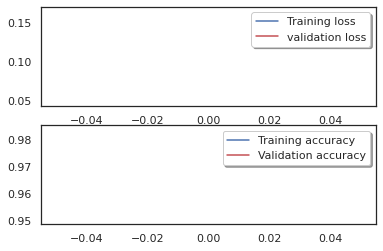

In [ ]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

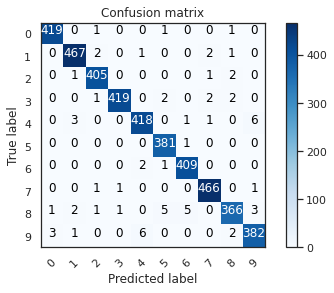

In [ ]:
# Look at confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 

# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

In [ ]:
Y_pred_classes

array([3, 6, 9, ..., 9, 8, 7])

In [ ]:

errors = (Y_pred_classes - Y_true != 0)
errors

array([False, False, False, ..., False,  True, False])

In [ ]:
Y_pred_classes_Errors=Y_pred_classes[errors]
Y_pred_classes_Errors

array([8, 3, 2, 5, 0, 1, 5, 7, 5, 4, 9, 9, 7, 4, 4, 4, 4, 9, 2, 9, 4, 3,
       1, 1, 4, 6, 5, 8, 8, 2, 5, 7, 7, 7, 6, 1, 9, 8, 5, 9, 1, 8, 8, 8,
       0, 1, 0, 6, 5, 9, 4, 5, 5, 2, 9, 9, 1, 6, 6, 7, 9, 6, 6, 2, 0, 2,
       4, 8])

In [ ]:
Y_true_Errors =Y_true[errors]
Y_true_Errors

array([9, 7, 1, 8, 9, 8, 6, 3, 8, 1, 4, 4, 2, 9, 9, 9, 6, 4, 1, 4, 9, 8,
       4, 8, 9, 5, 8, 1, 3, 0, 3, 4, 1, 3, 8, 4, 8, 2, 0, 4, 4, 2, 0, 9,
       9, 2, 9, 4, 8, 8, 9, 8, 3, 3, 4, 8, 9, 8, 8, 1, 7, 8, 8, 7, 8, 8,
       6, 3])

In [ ]:
X_val_errors = X_val[errors]


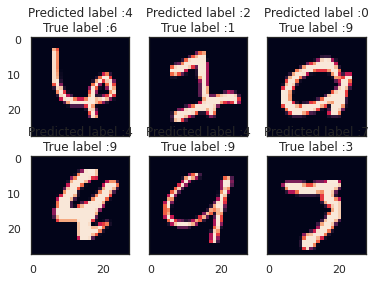

In [ ]:

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

In [ ]:
# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]


In [ ]:
errors

array([False, False, False, ..., False,  True, False])

In [ ]:
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)
Y_pred_errors_prob

array([0.61161274, 0.57168776, 0.80493224, 0.92592376, 0.9981371 ,
       0.80827004, 0.94596314, 0.6521479 , 0.9086202 , 0.9342082 ,
       0.5933636 , 0.82563853, 0.9024429 , 0.9986254 , 0.9999051 ,
       0.5777538 , 0.99563223, 0.5415077 , 0.99525756, 0.6125982 ,
       0.94434416, 0.6901491 , 0.5211333 , 0.9826658 , 0.9456491 ,
       0.85451424, 0.5622218 , 0.8265396 , 0.48906586, 0.5294217 ,
       0.7401489 , 0.5707085 , 0.97542375, 0.99996793, 0.59897697,
       0.8396897 , 0.72577274, 0.68772095, 0.9744615 , 0.6269082 ,
       0.8248268 , 0.7902838 , 0.82164913, 0.52525485, 0.7595682 ,
       0.5311934 , 0.96705496, 0.7109323 , 0.9269882 , 0.78944474,
       0.97142255, 0.6535278 , 0.80806315, 0.41346952, 0.59187657,
       0.88175225, 0.6308746 , 0.6432567 , 0.46305192, 0.8316514 ,
       0.7424502 , 0.83485276, 0.86433285, 0.7650971 , 0.32328936,
       0.9319652 , 0.9917504 , 0.8281437 ], dtype=float32)

array([3.6081162e-01, 4.1569093e-01, 1.9457777e-01, 6.7782499e-02,
       1.5056881e-03, 3.4480710e-02, 4.5907203e-02, 1.8664815e-01,
       8.8629819e-02, 6.5503478e-02, 4.0386987e-01, 8.8830933e-02,
       9.7411044e-02, 5.2563491e-04, 7.2285511e-05, 4.2177355e-01,
       4.3657171e-03, 4.5816386e-01, 2.4377604e-03, 3.7671697e-01,
       4.7129154e-02, 3.0591366e-01, 4.7886276e-01, 8.9131519e-03,
       5.4350659e-02, 1.3660933e-01, 3.1337019e-02, 2.6663007e-02,
       2.7742559e-01, 4.4770926e-01, 2.1740766e-01, 1.9110590e-01,
       2.4296453e-02, 3.0819290e-05, 2.6484808e-01, 1.5976468e-01,
       2.7012405e-01, 3.1099203e-01, 2.4253789e-02, 3.7251347e-01,
       1.6960720e-02, 1.6956042e-02, 1.0892086e-01, 3.2171103e-01,
       3.7155293e-02, 4.6833077e-01, 2.6157962e-02, 2.0646282e-01,
       6.8927586e-02, 1.9614641e-01, 2.7482562e-02, 3.3030272e-01,
       1.7953126e-01, 4.0992746e-01, 3.8927966e-01, 9.8038882e-02,
       2.0774415e-01, 3.2165000e-01, 4.5029727e-01, 1.6636501e